Pada file ini, akan dibahas program untuk penentuan kluster menggunakan algoritma <b>K-means Clustering</b>.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

Ide dari algoritma <b>K-means Clustering</b> adalah dengan menggunakan pusat kluster (disebut centroid), dengan tiap centroid memiliki label/klasifikasi tersendiri. Centroid pada awalnya memiliki nilai acak/bebas, namun diiterasi untuk memperbaiki nilai menggunakan:
$$ x_{c_j} = \frac{1}{N} \sum_{i \in I} x_i $$
$$ y_{c_j} = \frac{1}{N} \sum_{i \in I} x_i $$

dengan centroid ke-$j$ memiliki lokasi di $\left(x_{c_j}, y_{c_j}\right)$.

In [9]:
# Fungsi untuk menentukan posisi centroid yang baru
def new_center(arr):
    # n_size: ukuran/banyak dimensi (atau banyak kolom di tabel)
    n_size = len(arr)
    # point_size: banyak data yang ada
    point_size = len(arr[0])
    
    center = [0 for i in range(n_size)]
    # Rumus penentuan jarak baru pake rata2 biasa (bisa diganti kalau perlu)
    for n in range(n_size):
        for i in range(point_size):
            center[n] += arr[n][i]
        center[n] /= point_size
    
    return center

Penentuan jarak dihitung menggunakan <i>euclidean distance</i>, yakni:
$$ s^2 = \left(\Delta x\right)^2 + \left(\Delta y\right)^2 $$

In [10]:
# Menentukan jarak antara dua titik (titik acak dengan centroid)
def dist_calc(p1, p2):
    dist = 0
    # Jarak pake pythagoras (bisa diganti jadi manhattan distance, atau yang lain kalau perlu)
    for i in range(len(p1)):
        dist += (p1[i] - p2[i])**2

    return dist

Sebagai contoh, berikut titik-titik yang akan digunakan menggunakan algoritma ini:

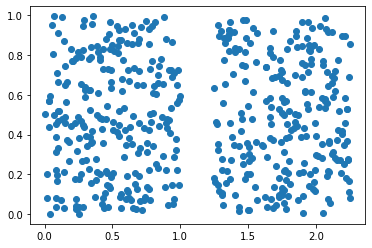

In [16]:
# Membangun titik acak (untuk contoh)
n = 500
x, y = np.random.rand(n), np.random.rand(n)
# Contoh pertama
x[n//2:n-1] += 1.25
y[n//2:n-1] += 0

# Inisiasi data (untuk digunakan)
data = [x, y]
feature_len = len(data)

plt.plot(x, y, 'o')
plt.show()

Sebagai contoh, akan digunakan 2 buah centroid, dengan titik awal centroid tersebut acak.

In [12]:
# Membangun centroid awal (sebanyak k)
### Komentar: Penentuan posisi awal centroid tidak harus acak, bisa ditentukan sendiri oleh pengguna
###           sesuai kebutuhan
k_centroid = 2  # Banyak centroid
centroid = []   # Posisi setiap centroid
for i in range(k_centroid):
    idx_point = np.random.randint(n, size=1)
    centroid.append([data[j][idx_point][0] for j in range(feature_len)])

Secara singkat, berikut adalah algoritma <b>K-means Clustering</b>:
1. Buat $k$ buah centroid, dengan lokasi acak/bebas
2. Untuk setiap titik, pilih centroid terdekat (jarak terkecil)
3. Update lokasi centroid baru
4. Ulangi langkah 2 dan 3

Secara umum, terdapat 2 kriteria pemberhentian dari algoritma ini:
1. Titik tidak mengalami perubahan kluster
2. Iterasi mencapai maksimum

Pada program ini, akan digunakan kriteria pemberhentian ke-2

Sehingga program K-means Clustering:

In [13]:
dist_to_cent = [0 for i in range(k_centroid)]
# Proses iterasi
### Komentar: Idealnya proses iterasi menggunakan pengecekan apakah ada titik yang berubah tipe atau enggak
###           Tapi karena agak susah diimplementasikan, jadi proses iterasi dibatasi sebanyak 10 kali (contoh)
for i in range(10):
    type_cent = [0 for i in range(n)]

    # Penentuan tipe centroid
    for j in range(n):
        # Penentuan jarak suatu titik ke setiap centroid
        for m in range(k_centroid):
            dist_to_cent[m] = dist_calc([data[p][j] for p in range(feature_len)], centroid[m])
        
        # Penentuan idx centroid mana yg minimum pada titik yg dipilih/ditinjau
        idx_cent_min = 0
        cent_min = dist_to_cent[0]
        for m in range(1, k_centroid):
            if cent_min > dist_to_cent[m]:
                idx_cent_min = m
                cent_min = dist_to_cent[m]
        type_cent[j] = idx_cent_min

    # Penentuan lokasi centroid baru
    for j in range(k_centroid):
        # Melakukan penyaringan untuk titik yg termasuk tipe/centroid saat ini
        chosen_point = [[] for p in range(feature_len)]
        for m in range(n):
            if type_cent[m] == j:
                for p in range(feature_len):
                    chosen_point[p].append(data[p][m])
        
        # Melakukan perhitungan lokasi centroid baru, setelah disaring
        centroid[j] = new_center(chosen_point)


Sehingga didapat hasil klasifikasi sebagai berikut:

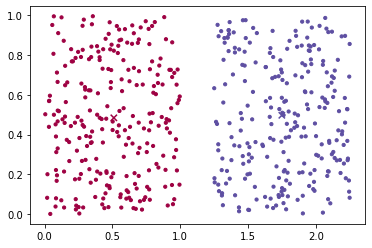

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [17]:
# type_cent : Tipe dari setiap titik/point
# centroid  : Posisi setiap centroid/tipe

# Plot untuk melihat hasil akhir (kebetulan 2d, jadi bisa diplot)
plt.scatter(x, y, s=10, c=[type_cent[i] for i in range(len(type_cent))], cmap='Spectral')
plt.scatter(x=[centroid[j][0] for j in range(k_centroid)],
            y=[centroid[j][1] for j in range(k_centroid)],
            c=[j for j in range(k_centroid)], marker='x', s=40, cmap="Spectral")
plt.show()

# Tipe dari setiap titik
print(type_cent)
# Hasil akhir posisi centroid
print(centroid)
